# Importing Libraries and Loading Datasets

In [3]:
# Install the required libraries if not already installed
# !pip install scikit-learn
# !pip install scikit-learn-intelex  # Install if it exists

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearnex import patch_sklearn

# Load your datasets
carbohydrates = pd.read_csv('carbohydrate.csv')
protein = pd.read_csv('protein.csv')
sat_fat = pd.read_csv('sat_fat.csv')
total_kcal = pd.read_csv('Total_Kcal.csv')


#  Merge Nutritional Information Datasets


In [4]:
# Merge nutritional information datasets based on 'Food_ID' or the appropriate common column with suffixes
merged_data = pd.merge(carbohydrates, protein, on='Food_ID', suffixes=('_carbs', '_protein'))
merged_data = pd.merge(merged_data, sat_fat, on='Food_ID', suffixes=('_merged', '_sat_fat'))
merged_data = pd.merge(merged_data, total_kcal, on='Food_ID', suffixes=('_merged', '_total_kcal'))


# Feature Engineering and Splitting Data

In [5]:
# Feature engineering and target variable selection
X = merged_data[['range_carbs', 'range_protein', 'range_total_kcal']]
y = merged_data['range_total_kcal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling

In [6]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Initialization and Hyperparameter Tuning

In [7]:
# Initialize the Intel scikit-learn patch
patch_sklearn()

# Initialize the model (Gradient Boosting Regressor in this example)
model = GradientBoostingRegressor()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


#  Model Evaluation and Metrics

In [8]:
# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Best Model Mean Squared Error: {mse}')


Best Model Mean Squared Error: 4417.442494196402


#  Scatter Plot for Selected Features

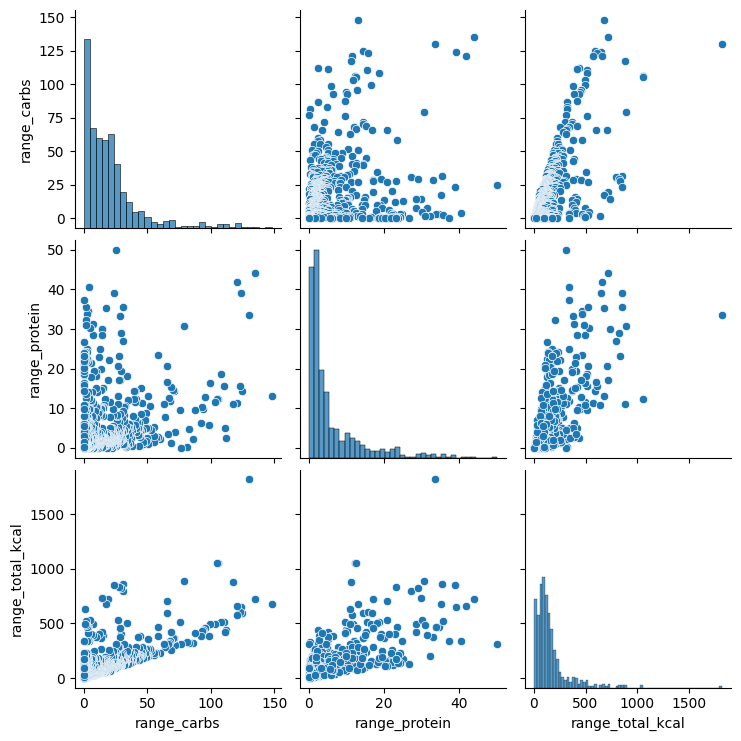

In [9]:
# Scatter plot for selected features
sns.pairplot(merged_data[['range_carbs', 'range_protein', 'range_total_kcal']])
plt.show()


# Feature Importance Plot

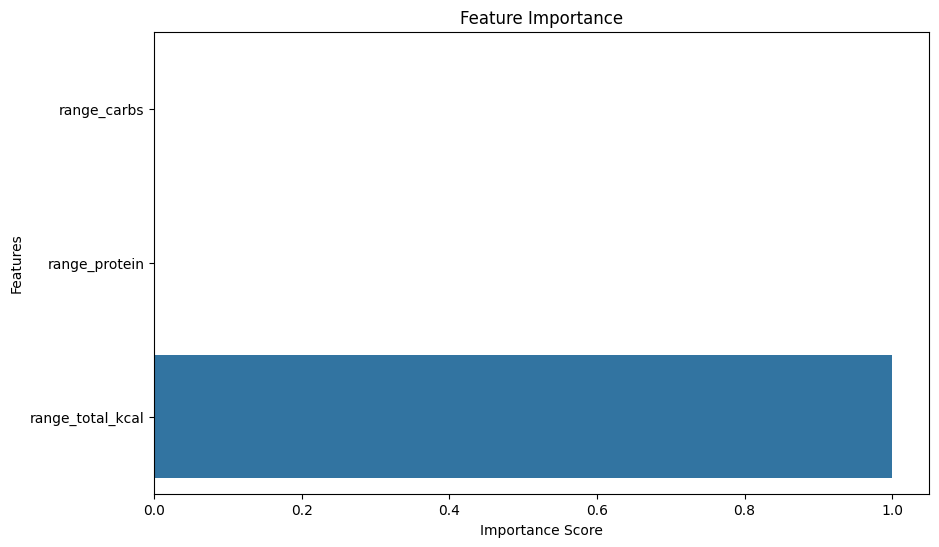

In [10]:
# Feature importance plot
feature_importance = best_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


#  Distribution Plot for Target Variable

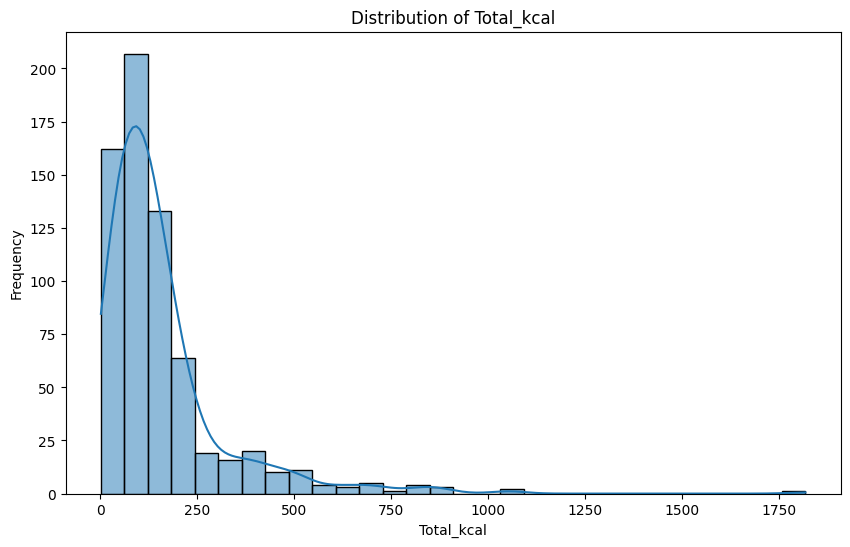

In [11]:
# Distribution plot for the target variable
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['range_total_kcal'], bins=30, kde=True)
plt.title('Distribution of Total_kcal')
plt.xlabel('Total_kcal')
plt.ylabel('Frequency')
plt.show()


#  Residual Plot

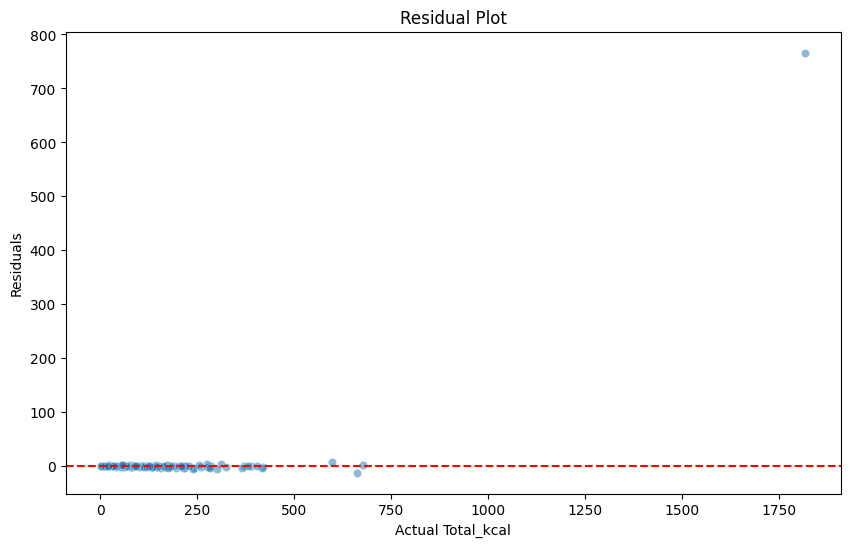

In [15]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Actual Total_kcal')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [ ]:
pip install gradio